In [45]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Importing and initializing the PCA class from scikit learn and then fitting the data to the model.
from sklearn.decomposition import PCA

In [46]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'interest rates.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (10491, 8)

First 5 rows
        dates       2Y       3Y      5Y      7Y     10Y     30Y  US RET
0   1/5/1983   -3.50%   -2.50%   0.00%   2.50%   3.00%   3.10%   0.26%
1   1/6/1983   -1.80%    1.20%  -0.80%   0.00%   1.00%   2.40%   1.89%
2   1/7/1983  -10.80%  -11.50%  -7.20%  -3.20%  -3.10%  -0.60%  -0.11%
3  1/10/1983   -3.50%   -1.30%  -1.60%   0.60%   0.50%   2.10%   1.00%
4  1/11/1983   -3.60%   -6.40%  -4.80%  -5.10%  -4.60%  -3.60%  -0.60%


In [47]:
raw.loc[:,'dates'] = pd.to_datetime(raw['dates'])
raw.loc[:,'2Y'] = raw['2Y'].str[:-1].astype(float)/100
raw.loc[:,'3Y'] = raw['3Y'].str[:-1].astype(float)/100
raw.loc[:,'5Y'] = raw['5Y'].str[:-1].astype(float)/100
raw.loc[:,'7Y'] = raw['7Y'].str[:-1].astype(float)/100
raw.loc[:,'10Y'] = raw['10Y'].str[:-1].astype(float)/100
raw.loc[:,'30Y'] = raw['30Y'].str[:-1].astype(float)/100
raw.loc[:,'US RET'] = raw['US RET'].str[:-1].astype(float)/100

C:\Users\gmimo\AppData\Local\Temp\ipykernel_19080\4179041166.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  raw.loc[:,'dates'] = pd.to_datetime(raw['dates'])
C:\Users\gmimo\AppData\Local\Temp\ipykernel_19080\4179041166.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  raw.loc[:,'2Y'] = raw['2Y'].str[:-1].astype(float)/100
C:\Users\gmimo\AppData\Local\Temp\ipykernel_19080\4179041166.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To 

In [48]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())


Summary statistics
                  2Y            3Y            5Y            7Y           10Y  \
count  10491.000000  10491.000000  10491.000000  10491.000000  10491.000000   
mean      -0.000517     -0.000560     -0.000621     -0.000648     -0.000656   
std        0.062144      0.063373      0.066093      0.064478      0.062552   
min       -0.830000     -0.580000     -0.630000     -0.670000     -0.710000   
25%       -0.024800     -0.030000     -0.033550     -0.034000     -0.035000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.024900      0.028400      0.031900      0.031300      0.032800   
max        0.690000      0.579700      0.680000      0.577100      0.396000   

                30Y        US RET  
count  10491.000000  10491.000000  
mean      -0.000644      0.000394  
std        0.055830      0.010964  
min       -0.621000     -0.187400  
25%       -0.032000     -0.004000  
50%        0.000000      0.000300  
75%        0.02

In [49]:
print("\nCorrelation matrix\n", raw.corr(numeric_only=True))


Correlation matrix
               2Y        3Y        5Y        7Y       10Y       30Y    US RET
2Y      1.000000  0.906244  0.858547  0.760852  0.773104  0.631024  0.065805
3Y      0.906244  1.000000  0.913521  0.828928  0.851213  0.704572  0.065531
5Y      0.858547  0.913521  1.000000  0.873384  0.915332  0.780051  0.069928
7Y      0.760852  0.828928  0.873384  1.000000  0.891914  0.802934  0.076540
10Y     0.773104  0.851213  0.915332  0.891914  1.000000  0.881398  0.063188
30Y     0.631024  0.704572  0.780051  0.802934  0.881398  1.000000  0.052508
US RET  0.065805  0.065531  0.069928  0.076540  0.063188  0.052508  1.000000


In [50]:
# normalization, remove dates and target variable
X = raw.drop(['dates', 'US RET'], axis=1)
X = (X - X.mean()) / X.std()
print(X.head(5))

         2Y        3Y        5Y        7Y       10Y       30Y
0 -0.554894 -0.385660  0.009393  0.397777  0.490087  0.566790
1 -0.281336  0.198183 -0.111648  0.010046  0.170355  0.441411
2 -1.729585 -1.805820 -1.079975 -0.486250 -0.485095 -0.095930
3 -0.554894 -0.196305 -0.232689  0.103101  0.090422  0.387677
4 -0.570986 -1.001063 -0.716852 -0.780925 -0.724894 -0.633272


In [51]:
# PCA
model = PCA(n_components=6).fit(X)
model

PCA(n_components=6)

In [52]:
# PC matrix
for c in model.components_.T:
    print(c)

[-0.39236418 -0.57279748  0.33507675  0.49687028 -0.38412386 -0.10604602]
[-0.41467956 -0.375549    0.06070246 -0.1926797   0.80207822 -0.0535172 ]
[-0.42566591 -0.11113131 -0.08400935 -0.55797059 -0.35983126  0.59882474]
[-0.41076241  0.17252355 -0.77609191  0.44018619  0.0371372   0.06362514]
[-0.42306371  0.25866975 -0.00421819 -0.3757458  -0.23733501 -0.74604052]
[-0.38103947  0.6494932   0.5240656   0.26403503  0.14810058  0.258214  ]


In [53]:
# Percentage of variation explained by successive eigenvectors/PCS
model.explained_variance_ratio_.round(2)

array([0.86, 0.08, 0.03, 0.02, 0.01, 0.01])

<BarContainer object of 6 artists>

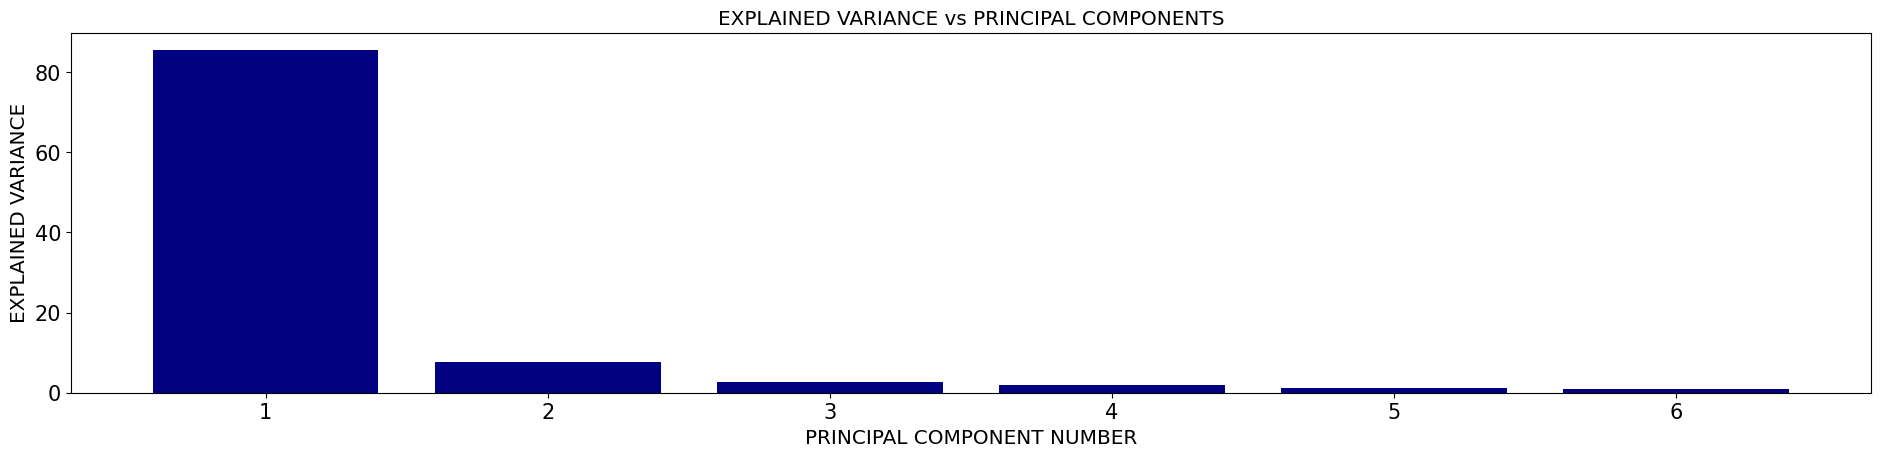

In [54]:
# Plotting the  Percentage of variation explained vs PCs
x_index = np.arange(1, X.shape[1]+1)

fig = plt.figure(figsize=(20,4))

axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.tick_params(axis='x', labelsize= 15 )
axes.tick_params(axis='y', labelsize= 15 )
axes.set_title('EXPLAINED VARIANCE vs PRINCIPAL COMPONENTS',fontsize='x-large')
axes.set_ylabel('EXPLAINED VARIANCE' ,fontsize='x-large')
axes.set_xlabel('PRINCIPAL COMPONENT NUMBER',fontsize='x-large')
axes.bar(x_index,model.explained_variance_ratio_*100,color='navy')

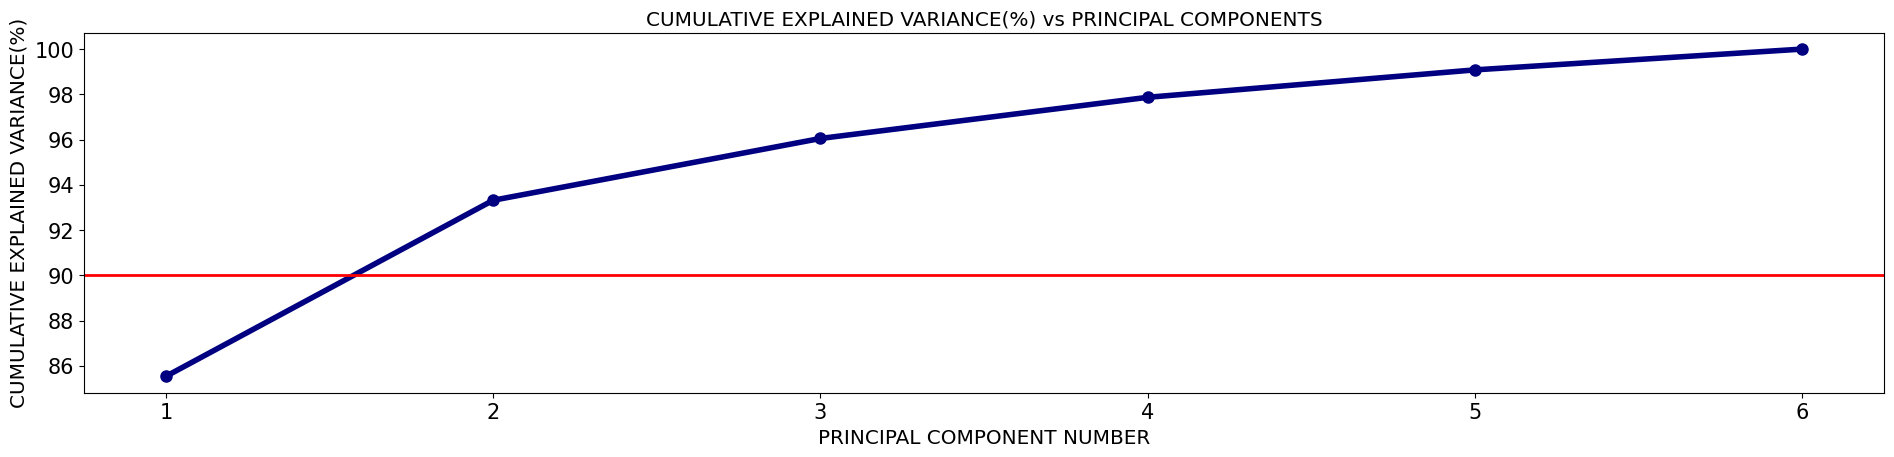

In [55]:
fig = plt.figure(figsize=(20,4))

axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.tick_params(axis='x', labelsize= 15 )
axes.tick_params(axis='y', labelsize= 15 )
axes.set_title('CUMULATIVE EXPLAINED VARIANCE(%) vs PRINCIPAL COMPONENTS',fontsize='x-large')
axes.set_ylabel('CUMULATIVE EXPLAINED VARIANCE(%)',fontsize='x-large')
axes.set_xlabel('PRINCIPAL COMPONENT NUMBER',fontsize='x-large')
axes.plot(x_index,np.cumsum(model.explained_variance_ratio_)*100,color='navy',lw =4, ls='-', marker='o', markersize='8')
plt.axhline(90,color='r',lw = 2)
plt.show();

In [56]:
# PCA
model_2 = PCA(n_components=2).fit(X)
model_2

PCA(n_components=2)

In [57]:
# PC matrix
model_2.components_

array([[-0.39236418, -0.41467956, -0.42566591, -0.41076241, -0.42306371,
        -0.38103947],
       [-0.57279748, -0.375549  , -0.11113131,  0.17252355,  0.25866975,
         0.6494932 ]])

In [58]:
# Percentage of variation explained by successive eigenvectors/PCS
model_2.explained_variance_ratio_.round(2)

array([0.86, 0.08])

In [59]:
principalComponents = model_2.fit_transform(X)
principalComponents

array([[-0.2130518 ,  1.02515572],
       [-0.16866428,  0.431621  ],
       [ 2.32868476,  1.5172196 ],
       ...,
       [-2.44367014, -0.12419382],
       [-5.5835707 , -2.0158748 ],
       [ 7.29402116,  2.20140068]])

In [60]:
ret = raw['US RET'].values
ret_stand = (ret - ret.mean()) / ret.std()
pd.DataFrame(np.hstack([principalComponents, ret_stand.reshape(-1,1)])).to_csv('PCAfactors_2_factors.csv')

In [61]:
pd.DataFrame(np.hstack([X, raw['US RET'].values.reshape(-1,1)])).to_csv('interest_rates_standardized.csv')

<AxesSubplot: xlabel='dates'>

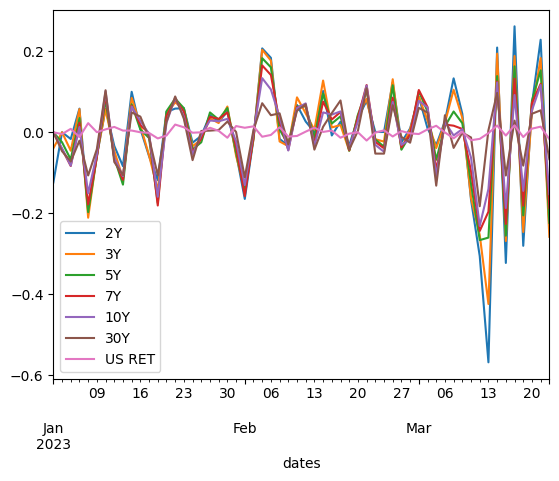

In [62]:
raw.loc[raw.dates > '2023-01-01'].plot.line(x='dates')

In [64]:
ret_stand

array([ 0.20124136,  1.68806316, -0.13625807, ...,  0.78502415,
        1.23198285, -1.58659345])